In [15]:
import keras
import tensorflow as tf

In [16]:
print('tensorflow ' + tf.__version__)
print('keras ' + keras.__version__)


tensorflow 2.17.0
keras 3.6.0


In [17]:
# load required modules
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [18]:
# load dataset
dataframe = pd.read_csv("C:\dankook\DeepLearning_Cloud\data\iris.csv")
dataset = dataframe.values
X = dataset[:,0:4].astype(float)  # input features
Y = dataset[:,4]  # output labels

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# one hot encoding
dummy_y = to_categorical(encoded_Y)

# Divide train, test
train_X, test_X, train_y, test_y = train_test_split(X, dummy_y, test_size=0.4, random_state=321)


In [19]:
# define model (DNN structure)
epochs = 50
batch_size = 10

model = Sequential()
model.add(Input(shape=(4,)))  # input layer (4 features)
model.add(Dense(10, activation='relu'))  # hidden layer 1
model.add(Dense(10, activation='relu'))  # hidden layer 2
model.add(Dense(3, activation='softmax'))  # output layer (3 classes)

model.summary()  # show model structure

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# model weights
for lay in model.layers:
    print(lay.name)
    print(lay.get_weights())


dense_6
[array([[ 2.8185403e-01, -2.7906328e-01,  1.1254406e-01,  7.5399876e-05,
         2.7762794e-01, -3.5306484e-01, -5.9142423e-01,  3.2195467e-01,
         1.3031346e-01,  3.7089610e-01],
       [-1.4073473e-01,  1.6691160e-01,  3.4284991e-01,  2.8209394e-01,
        -4.0463090e-02, -3.6887515e-01,  4.5307052e-01,  5.5775571e-01,
        -3.5169134e-01, -3.1550038e-01],
       [ 2.9347944e-01,  2.7592540e-01,  3.3104938e-01,  1.3160878e-01,
         2.8087556e-01, -4.8477978e-01,  3.5773325e-01,  5.0616658e-01,
         6.5256190e-01,  5.9669697e-01],
       [ 3.3848214e-01, -6.0616136e-03, -6.2236416e-01,  6.4246953e-02,
         7.2484910e-02,  4.5493901e-02, -1.6367701e-01,  3.0373669e-01,
         6.1323810e-01, -5.4104376e-01]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]
dense_7
[array([[-0.34264696, -0.3608768 , -0.2741691 ,  0.4799515 , -0.46786743,
         0.28413498, -0.11580086,  0.39963067,  0.3766234 ,  0.51881623],
       [ 0.448

In [21]:
# model fitting (learning)
disp = model.fit(train_X, train_y,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(test_X, test_y))


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.5679 - loss: 0.9821 - val_accuracy: 0.5667 - val_loss: 0.8897
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6376 - loss: 0.8306 - val_accuracy: 0.5000 - val_loss: 0.8545
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6893 - loss: 0.7974 - val_accuracy: 0.5833 - val_loss: 0.8148
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6469 - loss: 0.7553 - val_accuracy: 0.5833 - val_loss: 0.7743
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7069 - loss: 0.7010 - val_accuracy: 0.6000 - val_loss: 0.7567
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7642 - loss: 0.6551 - val_accuracy: 0.6000 - val_loss: 0.7405
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7025 - loss: 0.6547 - val_accuracy: 0.6000 - val_loss: 0.6953
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7118 - loss: 0.6151 - val_accuracy: 0.6333 - val_loss: 0.6239
E

In [22]:
# Test model
pred = model.predict(test_X)
print(pred)
y_classes = [np.argmax(y, axis=None, out=None) for y in pred]
print(y_classes)  # result of prediction

# model performance
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step 
[[9.6162885e-01 3.6349803e-02 2.0213372e-03]
 [6.8092614e-04 1.9110993e-01 8.0820906e-01]
 [2.4261075e-04 2.4455017e-01 7.5520718e-01]
 [2.6744610e-02 6.4080042e-01 3.3245501e-01]
 [9.6054363e-01 3.7896264e-02 1.5601832e-03]
 [1.8390588e-02 6.5292335e-01 3.2868600e-01]
 [8.5885811e-04 1.8637903e-01 8.1276220e-01]
 [9.6648872e-01 3.1958576e-02 1.5527746e-03]
 [3.1079946e-02 5.8316910e-01 3.8575098e-01]
 [9.6453851e-01 3.3543445e-02 1.9179585e-03]
 [9.6544802e-01 3.2801639e-02 1.7502530e-03]
 [9.7427082e-01 2.4793008e-02 9.3620614e-04]
 [6.5904446e-02 6.3298476e-01 3.0111083e-01]
 [2.8286772e-02 6.2187558e-01 3.4983763e-01]
 [1.8863563e-03 2.3051594e-01 7.6759773e-01]
 [3.0228294e-02 5.3374970e-01 4.3602204e-01]
 [5.4956030e-04 1.6414912e-01 8.3530134e-01]
 [9.5747817e-01 4.0284533e-02 2.2373162e-03]
 [1.2659467e-02 5.4836953e-01 4.3897098e-01]
 [9.2197579e-01 7.3208421e-02 4.8157321e-03]
 [4.5068408e-04 2.5387707e-01 7.4567229e-01]
 [1.2411257e-02 

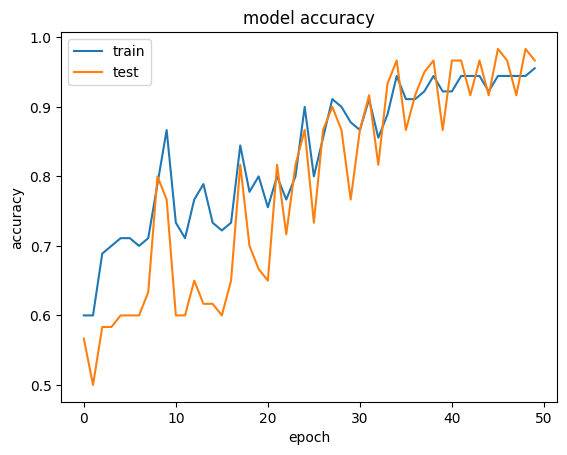

In [23]:
# summarize history for accuracy
plt.plot(disp.history['accuracy'])
plt.plot(disp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
